In [2]:
import numpy as np
import matplotlib.pyplot as plt
 
def f(y,t):
    return t*(y**2)

def y(t):
    return -2/(t**2-2)


In [3]:
t0 = 0.0
y0 = y(t0)

tau = 2.0

In [4]:
# First Order RK

y1 = y0 + tau*f(y0,t0)
print(f"First Order RK: y1_est = %.5f, y1_exact = %.5f, error = %.3f" % (y1,y(t0+tau), np.abs(y1-y(t0+tau))*100/y(t0+tau)))

First Order RK: y1_est = 1.00000, y1_exact = -1.00000, error = -200.000


In [5]:
# Second Order RK

k1 = f(y0,t0)
k2 = f(y0+tau*k1,t0+tau)

y1 = y0 + tau*(k1+k2)/2.0
print(f"Second Order RK: y1_est = %.5f, y1_exact = %.5f, error = %.3f" % (y1,y(t0+tau), np.abs(y1-y(t0+tau))*100/y(t0+tau)))

Second Order RK: y1_est = 3.00000, y1_exact = -1.00000, error = -400.000


In [6]:
# Third Order RK

k1 = f(y0,t0)
k2 = f(y0+tau*k1/2.0,t0+tau/2.0)
k3 = f(y0+tau*k2,t0+tau)

y1 = y0 + tau*(k1+4*k2+k3)/6.0
print(f"Third Order RK: y1_est = %.5f, y1_exact = %.5f, error = %.3f" % (y1,y(t0+tau), np.abs(y1-y(t0+tau))*100/y(t0+tau)))

Third Order RK: y1_est = 8.33333, y1_exact = -1.00000, error = -933.333


In [7]:
# Fourth Order RK

k1 = f(y0,t0)
k2 = f(y0+tau*k1/2.0,t0+tau/2.0)
k3 = f(y0+tau*k2/2.0,t0+tau/2.0)
k4 = f(y0+tau*k3,t0+tau)

print(k1,k2,k3,k4)

y1 = y0 + tau*(k1+2*k2+2*k3+k4)/6.0

print(f"Fourth Order RK: y1_est = %.5f, y1_exact = %.5f, error = %.3f" % (y1,y(t0+tau), np.abs(y1-y(t0+tau))*100/y(t0+tau)))

0.0 1.0 4.0 162.0
Fourth Order RK: y1_est = 58.33333, y1_exact = -1.00000, error = -5933.333


Text(0, 0.5, 'y')

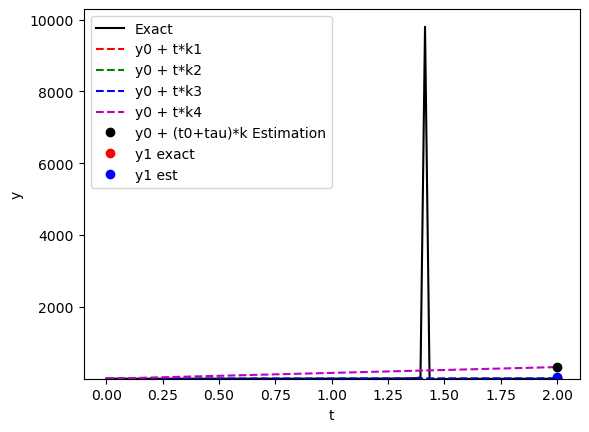

In [8]:
time = np.linspace(t0,t0+tau,100)
y_exact = y(time)

yk1 = y0 + time*k1
yk2 = y0 + time*k2
yk3 = y0 + time*k3
yk4 = y0 + time*k4

yk1pt = y0 + tau*k1
yk2pt = y0 + tau*k2
yk3pt = y0 + tau*k3
yk4pt = y0 + tau*k4
tau_array = np.array([t0+tau,t0+tau,t0+tau,t0+tau])
ypt_array = np.array([yk1pt,yk2pt,yk3pt,yk4pt])

tau_exact_pt = np.array([t0+tau])
y_exact_pt = np.array([y(t0+tau)])

tau_est_pt = np.array([t0+tau])
y_est_pt = np.array([y1])


plt.plot(time,y_exact,'k-',label='Exact')
plt.plot(time,yk1,'r--',label='y0 + t*k1')
plt.plot(time,yk2,'g--',label='y0 + t*k2')
plt.plot(time,yk3,'b--',label='y0 + t*k3')
plt.plot(time,yk4,'m--',label='y0 + t*k4')
plt.plot(tau_array,ypt_array,'ko',label='y0 + (t0+tau)*k Estimation')
plt.plot(tau_exact_pt,y_exact_pt,'ro',label='y1 exact')
plt.plot(tau_est_pt,y_est_pt,'bo',label='y1 est')
plt.ylim(0.8)

plt.legend()
plt.xlabel('t')
plt.ylabel('y')

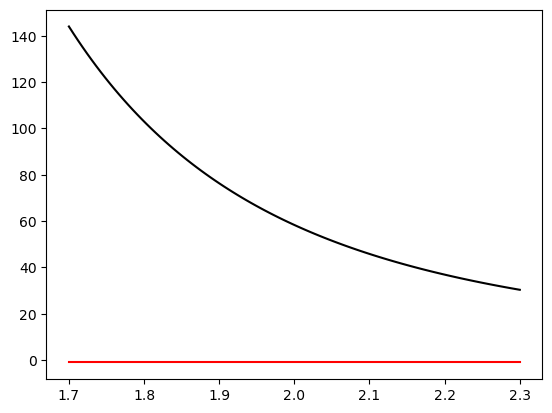

In [9]:
# Adaptive Step Size Fourth Order RK
divisor = np.linspace(1.7,2.3,100)

k1 = f(y0,t0)
k2 = f(y0+tau*k1/divisor,t0+tau/divisor)
k3 = f(y0+tau*k2/divisor,t0+tau/divisor)
k4 = f(y0+tau*k3,t0+tau)

y1 = y0 + tau*(k1+2*k2+2*k3+k4)/6.0

plt.plot(divisor,y1,'k-')
y_expected = [y(t0+tau) for div in divisor]
plt.plot(divisor,y_expected,'r-')

#print(f"Fourth Order RK: y1_est = %.5f, y1_exact = %.5f, error = %.3f" % (y1,y(tau), np.abs(y1-y(tau))*100/y(tau)))


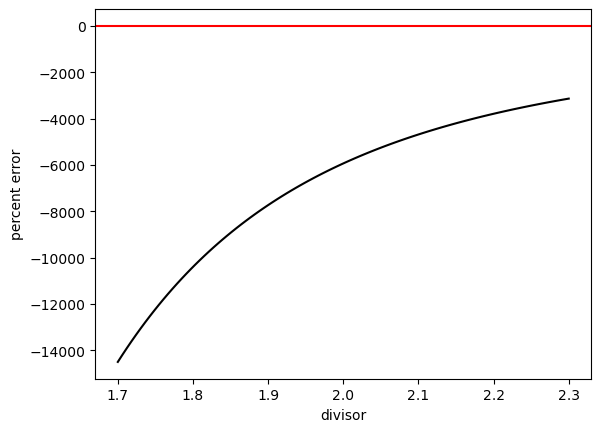

In [10]:
percent_error = np.abs(y1-y(t0+tau))*100/y(t0+tau)
plt.plot(divisor,percent_error,'k-')
plt.xlabel('divisor')
plt.ylabel('percent error')
plt.axhline(0.0,color='r')